## Observations and Insights 

Analysis:

This project started by cleaning the data frame to avoid erroneous data. Mouse ID g989 had two data values in the table for each timpepoint interval. Consequently, a new dataframe was created by omitting this duplicate. 

Conclusions:

1.
Based on the box plot that was constructed from the four selected treatments (of the ten total included in the study), we can determine that mice treated with Capomulin and Ramicane ended study with smaller median tumor sizes compared to their initial volumes at the beginning of the 45 days.

2.
The median tumor volumes of mice treated with Infubinal and Ceftamin not only failed to reduce or shrink in size, but actually ended the study with larger tumor volumes on average. 

3.
Although mice included in the study started out with similar tumor volumes (45 cubic millimeters), their overall starting weight (recorded in grams) was not consistent. By focusing on the mice treated specifically with Capomulin, we can see that a direct relationship exists between initial mouse weight and the average tumor volume throughout the study. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete_df = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')

# Display the data table for preview
study_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice_count = len(study_complete_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_point=study_complete_df["Timepoint"].value_counts()
time_point

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
number_id_occur = study_complete_df['Mouse ID'].value_counts()
number_id_occur

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# not sure if this step is necessary, ask tutor 
number_id_occur = number_id_occur.reset_index()
number_id_occur

,index,Mouse ID
0,g989,13
1,b128,10
2,q787,10
3,s337,10
4,q511,10
...,...,...
244,f932,1
245,b447,1
246,u153,1
247,t573,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# duplicate mice
duplicate_mice = number_id_occur.loc[number_id_occur['Mouse ID']>len(time_point)]
duplicate_mice

,index,Mouse ID
0,g989,13


In [7]:
# why are we using 0,0 if there are multiple duplicate mice?
duplicate_mice = duplicate_mice.iloc[0,0]

duplicate_mice

'g989'

In [8]:
type(duplicate_mice)

str

In [9]:
# keep = false means you want to lis ALL duplicates (can exckude first or last)
study_complete_df.loc[study_complete_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID, (Hardcode: could enter duplicate mice value as string)
all_data_duplicate_df = study_complete_df.loc[study_complete_df["Mouse ID"]==duplicate_mice]
all_data_duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID, all columns not equal to repeated value
clean_data = study_complete_df.loc[study_complete_df['Mouse ID']!=duplicate_mice]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# check your work
clean_data['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [13]:
# check type, series and dataframe function differ
type(clean_data)

pandas.core.frame.DataFrame

In [14]:
# this makes sense because we only removed the one duplicate mouse from our previous unique total
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [15]:
# generate a summary statistics table of mean, median, variance, std dev, and SEM of the tumor volume per regimen
mean_tv = clean_data.groupby('Drug Regimen').mean().iloc[:,1]
# previous comment tell us to set to regimen as index, this is why we are using groupby function 
median_tv = clean_data.groupby('Drug Regimen').median().iloc[:,1]
# remember that the first colon mean all ROWS, 1 means second column 
variance_tv = clean_data.groupby('Drug Regimen').var().iloc[:,1]
# tv stands for tumor volume, sd/std for standard deviation 
sd_tv = clean_data.groupby('Drug Regimen').std().iloc[:,1]
# SEM is the standard deviation of mean of random samples drawn from the original population
sem_tv = clean_data.groupby('Drug Regimen').sem().iloc[:,1]
# print one of these df to look at 
print(mean_tv)
type(mean_tv)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_5923/890246701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tv = clean_data.groupby('Drug Regimen').mean().iloc[:,1]
/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_5923/890246701.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tv = clean_data.groupby('Drug Regimen').median().iloc[:,1]
/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_5923/890246701.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either 

pandas.core.series.Series

In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_stat_df = pd.DataFrame({'Mean':mean_tv,
                                   'Median':median_tv,
                                   'Variance':variance_tv,
                                   'Std Dev':sd_tv,
                                   'Std Err Mean':sem_tv})

summary_stat_df

,Mean,Median,Variance,Std Dev,Std Err Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_data = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# this method takes str(), (), or a [] of these and computes all the aggregates at once
agg_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
# create a groupby indexed by 'Drug Regimen' column values
drug_regimen_groupby =  clean_data.groupby(['Drug Regimen'])

# the number of timepoints for all mice tested, sorted by descending mouse/time count
total_timepoints = drug_regimen_groupby.size().sort_values(ascending=False)
# print
total_timepoints

# Alternate Method
# count_df = clean_data.groupby(['Drug Regimen']).count()
# print(count_df )

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

Text(0.5, 1.0, 'Treatment by Mouse Count')

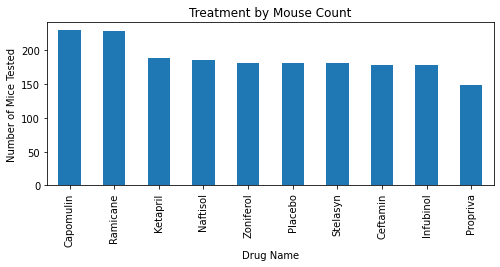

In [19]:
# Generate bar plot showing total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_reg_chart = total_timepoints.plot(kind='bar', figsize=(8,3))

# Set the xlabel and ylabels per directions 
mice_per_reg_chart.set_xlabel("Drug Name")
mice_per_reg_chart.set_ylabel("Number of Mice Tested")
mice_per_reg_chart.set_title("Treatment by Mouse Count")
# plt.show()

# Alternate Method 
# Drug_Regimen = summary_statistics.reset_index().iloc[:,1].to_list()
# Drug_Regimen

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

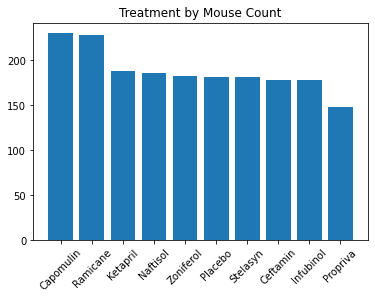

In [20]:
# Generate bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(total_timepoints.index, total_timepoints.values,alpha= 1)
plt.title("Treatment by Mouse Count")
plt.xticks(rotation = 45)

In [21]:
# remember to use clean_data for pie chart
mice_by_sex = clean_data.groupby(["Sex"]).count()["Mouse ID"]
mice_by_sex
# Alternate Method 
# sex_count_df = clean_data.groupby(["Sex"]).value_counts()
# sex_count_df

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

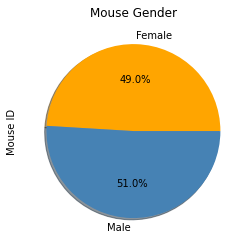

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas, 
colors = ["orange", "steelblue"]

mice_by_sex.plot(kind="pie",autopct="%1.1f%%",title="Mouse Gender", shadow=True, colors=colors)

plt.show()

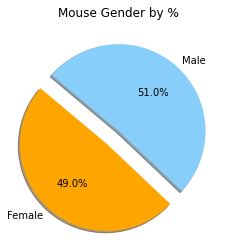

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_by_sex = clean_data.groupby(['Sex']).count()
#print(count_sex_df)

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["orange",  "lightskyblue"]

myexplode = [0.2, 0]

plt.pie(sizes, explode=myexplode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mouse Gender by %")
plt.show() 

## Quartiles, Outliers and Boxplots

In [31]:
# including this cell to show that the average tumor volume did decrease over time 
min_timepoint = clean_data.groupby("Timepoint")["Tumor Volume (mm3)"].min().reset_index()
min_timepoint

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,36.321346
2,10,34.850998
3,15,32.623003
4,20,30.485985
5,25,33.118756
6,30,31.099498
7,35,26.546993
8,40,24.365505
9,45,22.050126


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin (remember to ake this a list using variable)

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoint

# max_tp_df =  clean_data.merge(max_timepoint, on =['Drug Regimen','Mouse ID','Timepoint'])
# drug_q_df=max_timepoint_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').quantile([.25,.5,.75])

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [32]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint = max_timepoint.merge(clean_data, on=["Mouse ID","Timepoint"], how="left")
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels), remember square brackets = list 
# could also use .isin() function here 
drug_list =  clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Create empty list to fill with tumor vol data (for plotting)
final_tv = []

In [34]:
# Put treatments into a list for for loop (and later for plot labels)
select_treatments =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers using for loop.  
for drug_name in select_treatments:
       # Locate the rows which contain mice on each drug and get the tumor volumes
        loop_mice = last_timepoint.loc[last_timepoint["Drug Regimen"] == drug_name, "Tumor Volume (mm3)"]
        
        # add subset using empty list
        final_tv.append(loop_mice)
        
        # Determine outliers using upper and lower bounds (pulled from instructor activity)
        quartiles = loop_mice.quantile([.25, .5, .75])
   
        lowerq = quartiles[.25]
        upperq = quartiles[.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = loop_mice.loc[(loop_mice < lower_bound) | (loop_mice > upper_bound)]
        print(iqr)
        print(f"The lower quartile of tumor volume is: {lowerq}")
        print(f"The upper quartile of tumor volume is: {upperq}")
        print(f"The interquartile range of tumor volume is: {iqr}")
        print(f"The the median of tumor volume is: {quartiles[0.5]} ")
        print(f"Values below {lower_bound} could be outliers.")
        print(f"Values above {upper_bound} could be outliers.")


7.781863460000004
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
9.098536719999998
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
11.477135160000003
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
15.577752179999997
Th

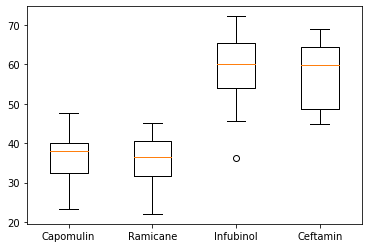

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_tv, labels=select_treatments)
plt.show()

## Line and Scatter Plots

In [36]:
# create dataframe for mouse treated with Capomilin drug 
t565_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "t565")]
t565_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
245,t565,0,45.000000,0,Capomulin,Female,20,17
460,t565,5,45.895647,0,Capomulin,Female,20,17
659,t565,10,46.749006,0,Capomulin,Female,20,17
785,t565,15,44.440949,0,Capomulin,Female,20,17
1039,t565,20,39.070214,0,Capomulin,Female,20,17
1145,t565,25,37.342210,0,Capomulin,Female,20,17
1440,t565,30,32.868916,0,Capomulin,Female,20,17
1523,t565,35,33.515671,0,Capomulin,Female,20,17
1657,t565,40,33.949341,0,Capomulin,Female,20,17
1769,t565,45,34.455298,0,Capomulin,Female,20,17


Text(0, 0.5, 'Tumor Volume (mm3)')

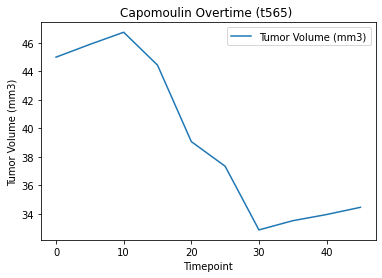

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ax = t565_df.plot(kind ='line' ,x='Timepoint' , y='Tumor Volume (mm3)' , title ="Capomoulin Overtime (t565) ")

ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")

# #Line plot


In [38]:
# create new df with only Capomulin data 
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [39]:
# calculate average tumor volume for each mouse, only one weight calculation per mouse metadata csv
capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()
# this step also filters data so there is only one TV per mouse treat with Capomulin
capomulin_mean

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_5923/2324635312.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


<function matplotlib.pyplot.show(close=None, block=None)>

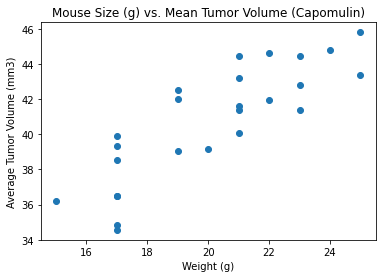

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_mean["Mouse Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
plt.title("Mouse Size (g) vs. Mean Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [42]:
#calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
lin_reg_mod = st.linregress(capomulin_mean["Weight (g)"], capomulin_mean["Tumor Volume (mm3)"])
lin_reg_mod 

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [43]:
#95% confidence interval
slope = .95 
intercept = 21.552160532685015

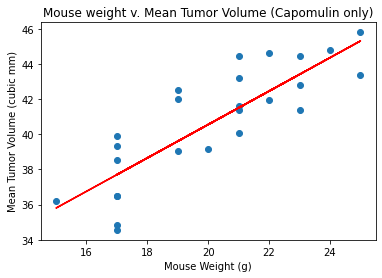

In [44]:
# plot the regression line for relationship on scatter plot from previous section

y_values = capomulin_mean["Weight (g)"]*slope + intercept
plt.scatter(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
plt.plot(capomulin_mean["Weight (g)"],y_values,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (cubic mm)")
plt.title("Mouse weight v. Mean Tumor Volume (Capomulin only)")
plt.show()